<center><h1>Masters_Daniel_HW5</h1></center>
<br>
<br>

Name: Daniel Masters
<br>
Github Username: damasters
<br>
USC ID: 6203966253

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
!pip install scikit-multilearn

### (a) Obtain Data

In [49]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import _tree
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Get the Accute Inamations Data Set

In [3]:
accute_df = pd.read_csv('diagnosis.data', encoding = 'utf-16', header= None, sep = '\t')
accute_df[0] = accute_df[0].replace(',','.', regex=True)
accute_df[0] = accute_df[0].astype(float)
accute_df.index.name = 'Patient_id'
accute_df.rename(columns={0: 'Temperature of Patient', 1:'Occurence of Nausea', 2:'Lumbar Pain', 3:'Urine Pushing', 4:'Micturition Pains', 5:'Burn/Itch/Swell of Urethra', 6:'Decision:Inflammation of Urinary Bladder', 7:'Decision: Nephritis of Renal Pelvis Origin'}, inplace = True)
# accute_df['Temp > 38'] = np.where(accute_df['Temp of Patient'] > 38.0, 'yes', 'no')
accute_df

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,Burn/Itch/Swell of Urethra,Decision:Inflammation of Urinary Bladder,Decision: Nephritis of Renal Pelvis Origin
Patient_id,,,,,,,,
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes


### (b) Build a decision tree

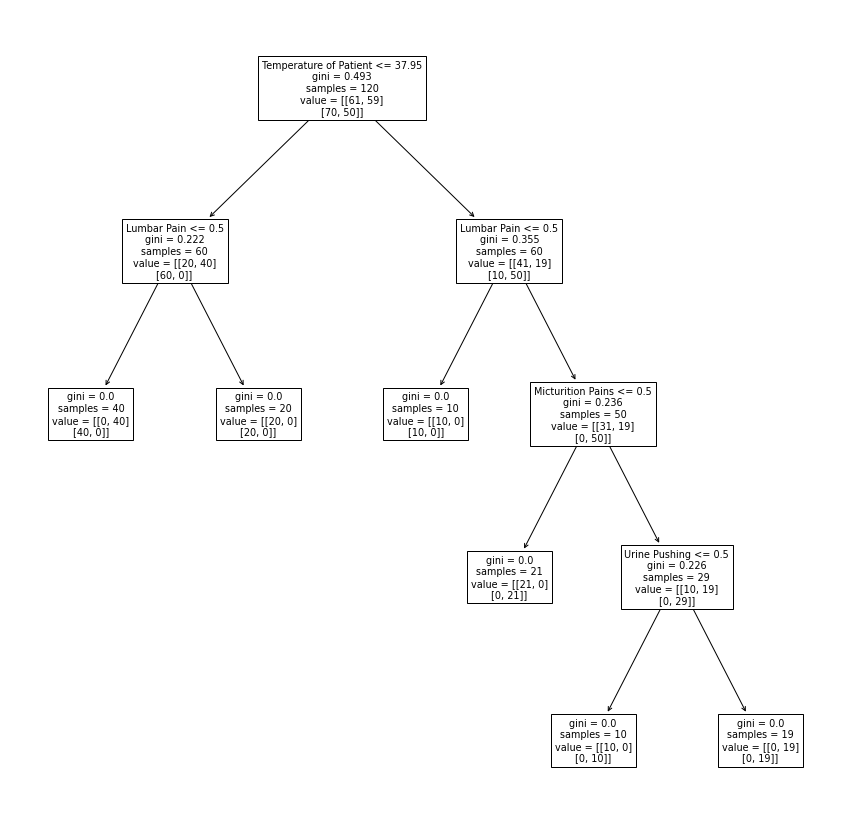

In [4]:
#want to construct for acute nephritis and acute inflammation of urinary bladder
#making unpruned model
#acute inflammation of urinary bladder = below 38 degree celsius
#acute nephritis = above 38 degrees celsius
l_encoder = preprocessing.LabelEncoder()

for i in range(1,8):
    accute_df.iloc[:, i] = l_encoder.fit_transform(accute_df.iloc[:,i])

X = accute_df[['Temperature of Patient', 'Occurence of Nausea', 'Lumbar Pain', 'Urine Pushing', 'Micturition Pains', 'Burn/Itch/Swell of Urethra']]
y = accute_df[['Decision:Inflammation of Urinary Bladder', 'Decision: Nephritis of Renal Pelvis Origin']]

model = DecisionTreeClassifier()
# t_model = LabelPowerset(DecisionTreeClassifier())
model.fit(X, y)
# plotDecisionTree(t_model, feature_names=X.columns)
plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=X.columns, class_names= y.columns)
plt.show()




# entropy = measurement of how much randomness data contains
# gini = measurement of randomly selecting a variable, what is prob tht it will wrongly classify
# max_depth = more depth = more splits, but too much max_depth = overfitting
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


### (c) Convert the decision rules

In [5]:
#REFERENCE to the function below: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)

tree_to_code(model, X.columns)

def tree(Temperature of Patient, Occurence of Nausea, Lumbar Pain, Urine Pushing, Micturition Pains, Burn/Itch/Swell of Urethra):
  if Temperature of Patient <= 37.95000076293945:
    if Lumbar Pain <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if Lumbar Pain > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if Temperature of Patient > 37.95000076293945
    if Lumbar Pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar Pain > 0.5
      if Micturition Pains <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition Pains > 0.5
        if Urine Pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine Pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\base.py", li

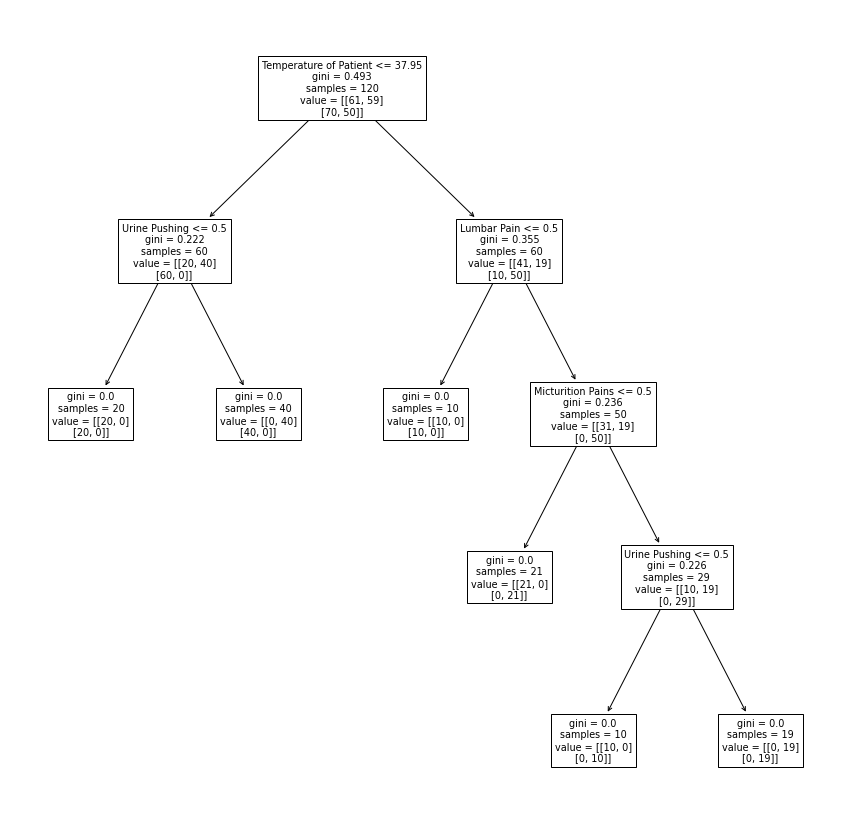

def tree(Temperature of Patient, Occurence of Nausea, Lumbar Pain, Urine Pushing, Micturition Pains, Burn/Itch/Swell of Urethra):
  if Temperature of Patient <= 37.95000076293945:
    if Urine Pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine Pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature of Patient > 37.95000076293945
    if Lumbar Pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar Pain > 0.5
      if Micturition Pains <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition Pains > 0.5
        if Urine Pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine Pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


In [6]:
#use gridserachcv to tune decision tree params: max_depth, min_samples_split, min_impurity_decrease
params = {'max_depth':range(0,120)}
#predict each observation belongs to the most commonly occurring class of training observations in the region to which it belongs

#GET ALPHAS?
new_model = GridSearchCV(DecisionTreeClassifier(), params)
new_model.fit(X, y)
best_model = new_model.best_estimator_
plt.figure(figsize=(15,15))
tree.plot_tree(best_model, feature_names=X.columns, class_names= y.columns)
plt.show()
tree_to_code(best_model, X.columns)

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [7]:
comm_df = pd.read_csv('communities.data', header = None)
train_set = comm_df.iloc[0:1495, 5:]
test_set = comm_df.iloc[1495:, 5:]
print(train_set)
print(test_set)

       5     6     7     8     9     10    11    12    13    14   ...   118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1490  0.00  0.59  0.01  0.69  1.00  0.07  0.41  0.28  0.23  0.57  ...  0.02   
1491  0.16  0.62  0.03  0.74  0.48  0.42  0.44  0.57  0.40  0.25  ...  0.07   
1492  0.01  0.36  0.95  0.24  0.03  0.01  0.44  0.42  0.27  0.63  ...  0.03   
1493  0.06  0.53  0.01  0.98  0.05  0.01  0.40  0.40  0.24  0.29  ...  0.08   
1494  0.05  0.43  0.08  0.65  0.12  1.00  0.37  0.52  0.33  0.44  ...  0.00   

       119   120   121   122   123  124   125   126

### (b) Missing values

In [8]:
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
#I chose this because it computes the mean for each missing value using nearest neighbors which gives more diversity of each 
# data point rather than just replacing each missing value with a singular mean or median value from that column
train_set.replace('?', np.nan, inplace=True)
test_set.replace('?', np.nan, inplace=True)
null_impute = KNNImputer()
train = null_impute.fit_transform(train_set)
test = null_impute.fit_transform(test_set)
new_train = pd.DataFrame(train)
new_test = pd.DataFrame(test)
print(new_train)
print(new_test)


       0     1     2     3     4     5     6     7     8     9    ...   113  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1490  0.00  0.59  0.01  0.69  1.00  0.07  0.41  0.28  0.23  0.57  ...  0.02   
1491  0.16  0.62  0.03  0.74  0.48  0.42  0.44  0.57  0.40  0.25  ...  0.07   
1492  0.01  0.36  0.95  0.24  0.03  0.01  0.44  0.42  0.27  0.63  ...  0.03   
1493  0.06  0.53  0.01  0.98  0.05  0.01  0.40  0.40  0.24  0.29  ...  0.08   
1494  0.05  0.43  0.08  0.65  0.12  1.00  0.37  0.52  0.33  0.44  ...  0.00   

       114   115    116    117    118  119   120   

### (c) Plot a correlation matrix

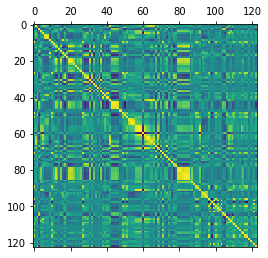

In [9]:
concat_df = pd.concat([new_train, new_test], ignore_index = True)
plt.matshow(concat_df.corr())
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [10]:
cv = []
colval_list = []
for val in concat_df:
    col_vals = concat_df[val].tolist()
    colval_list.append(col_vals)
for i in colval_list:    
    s = np.var(i)
    v = np.mean(i)
    cv.append(s/v)
for j in cv:
    print("The coefficient of variation for feature "+str(cv.index(j))+ " is: "+str(j))

The coefficient of variation for feature 0 is: 0.27949708582382465
The coefficient of variation for feature 1 is: 0.057811836012360625
The coefficient of variation for feature 2 is: 0.35740724042695965
The coefficient of variation for feature 3 is: 0.07897582911819075
The coefficient of variation for feature 4 is: 0.2837559755365823
The coefficient of variation for feature 5 is: 0.37511784605156084
The coefficient of variation for feature 6 is: 0.05674831188288766
The coefficient of variation for feature 7 is: 0.041711961692117584
The coefficient of variation for feature 8 is: 0.0824051322810058
The coefficient of variation for feature 9 is: 0.07583656128436982
The coefficient of variation for feature 10 is: 0.25660718222293677
The coefficient of variation for feature 11 is: 0.2840242011580277
The coefficient of variation for feature 12 is: 0.12131774754326305
The coefficient of variation for feature 13 is: 0.059912313493095726
The coefficient of variation for feature 14 is: 0.14280979

### (e) Scatter plots and box plots for highest CV features

11 Highest CV's
      0         1
0   120  0.613795
1    90  0.442312
2     5  0.375118
3    89  0.357454
4     2  0.357407
5    49  0.325219
6   115  0.324333
7    61  0.320420
8    57  0.306519
9    56  0.306399
10   58  0.303166


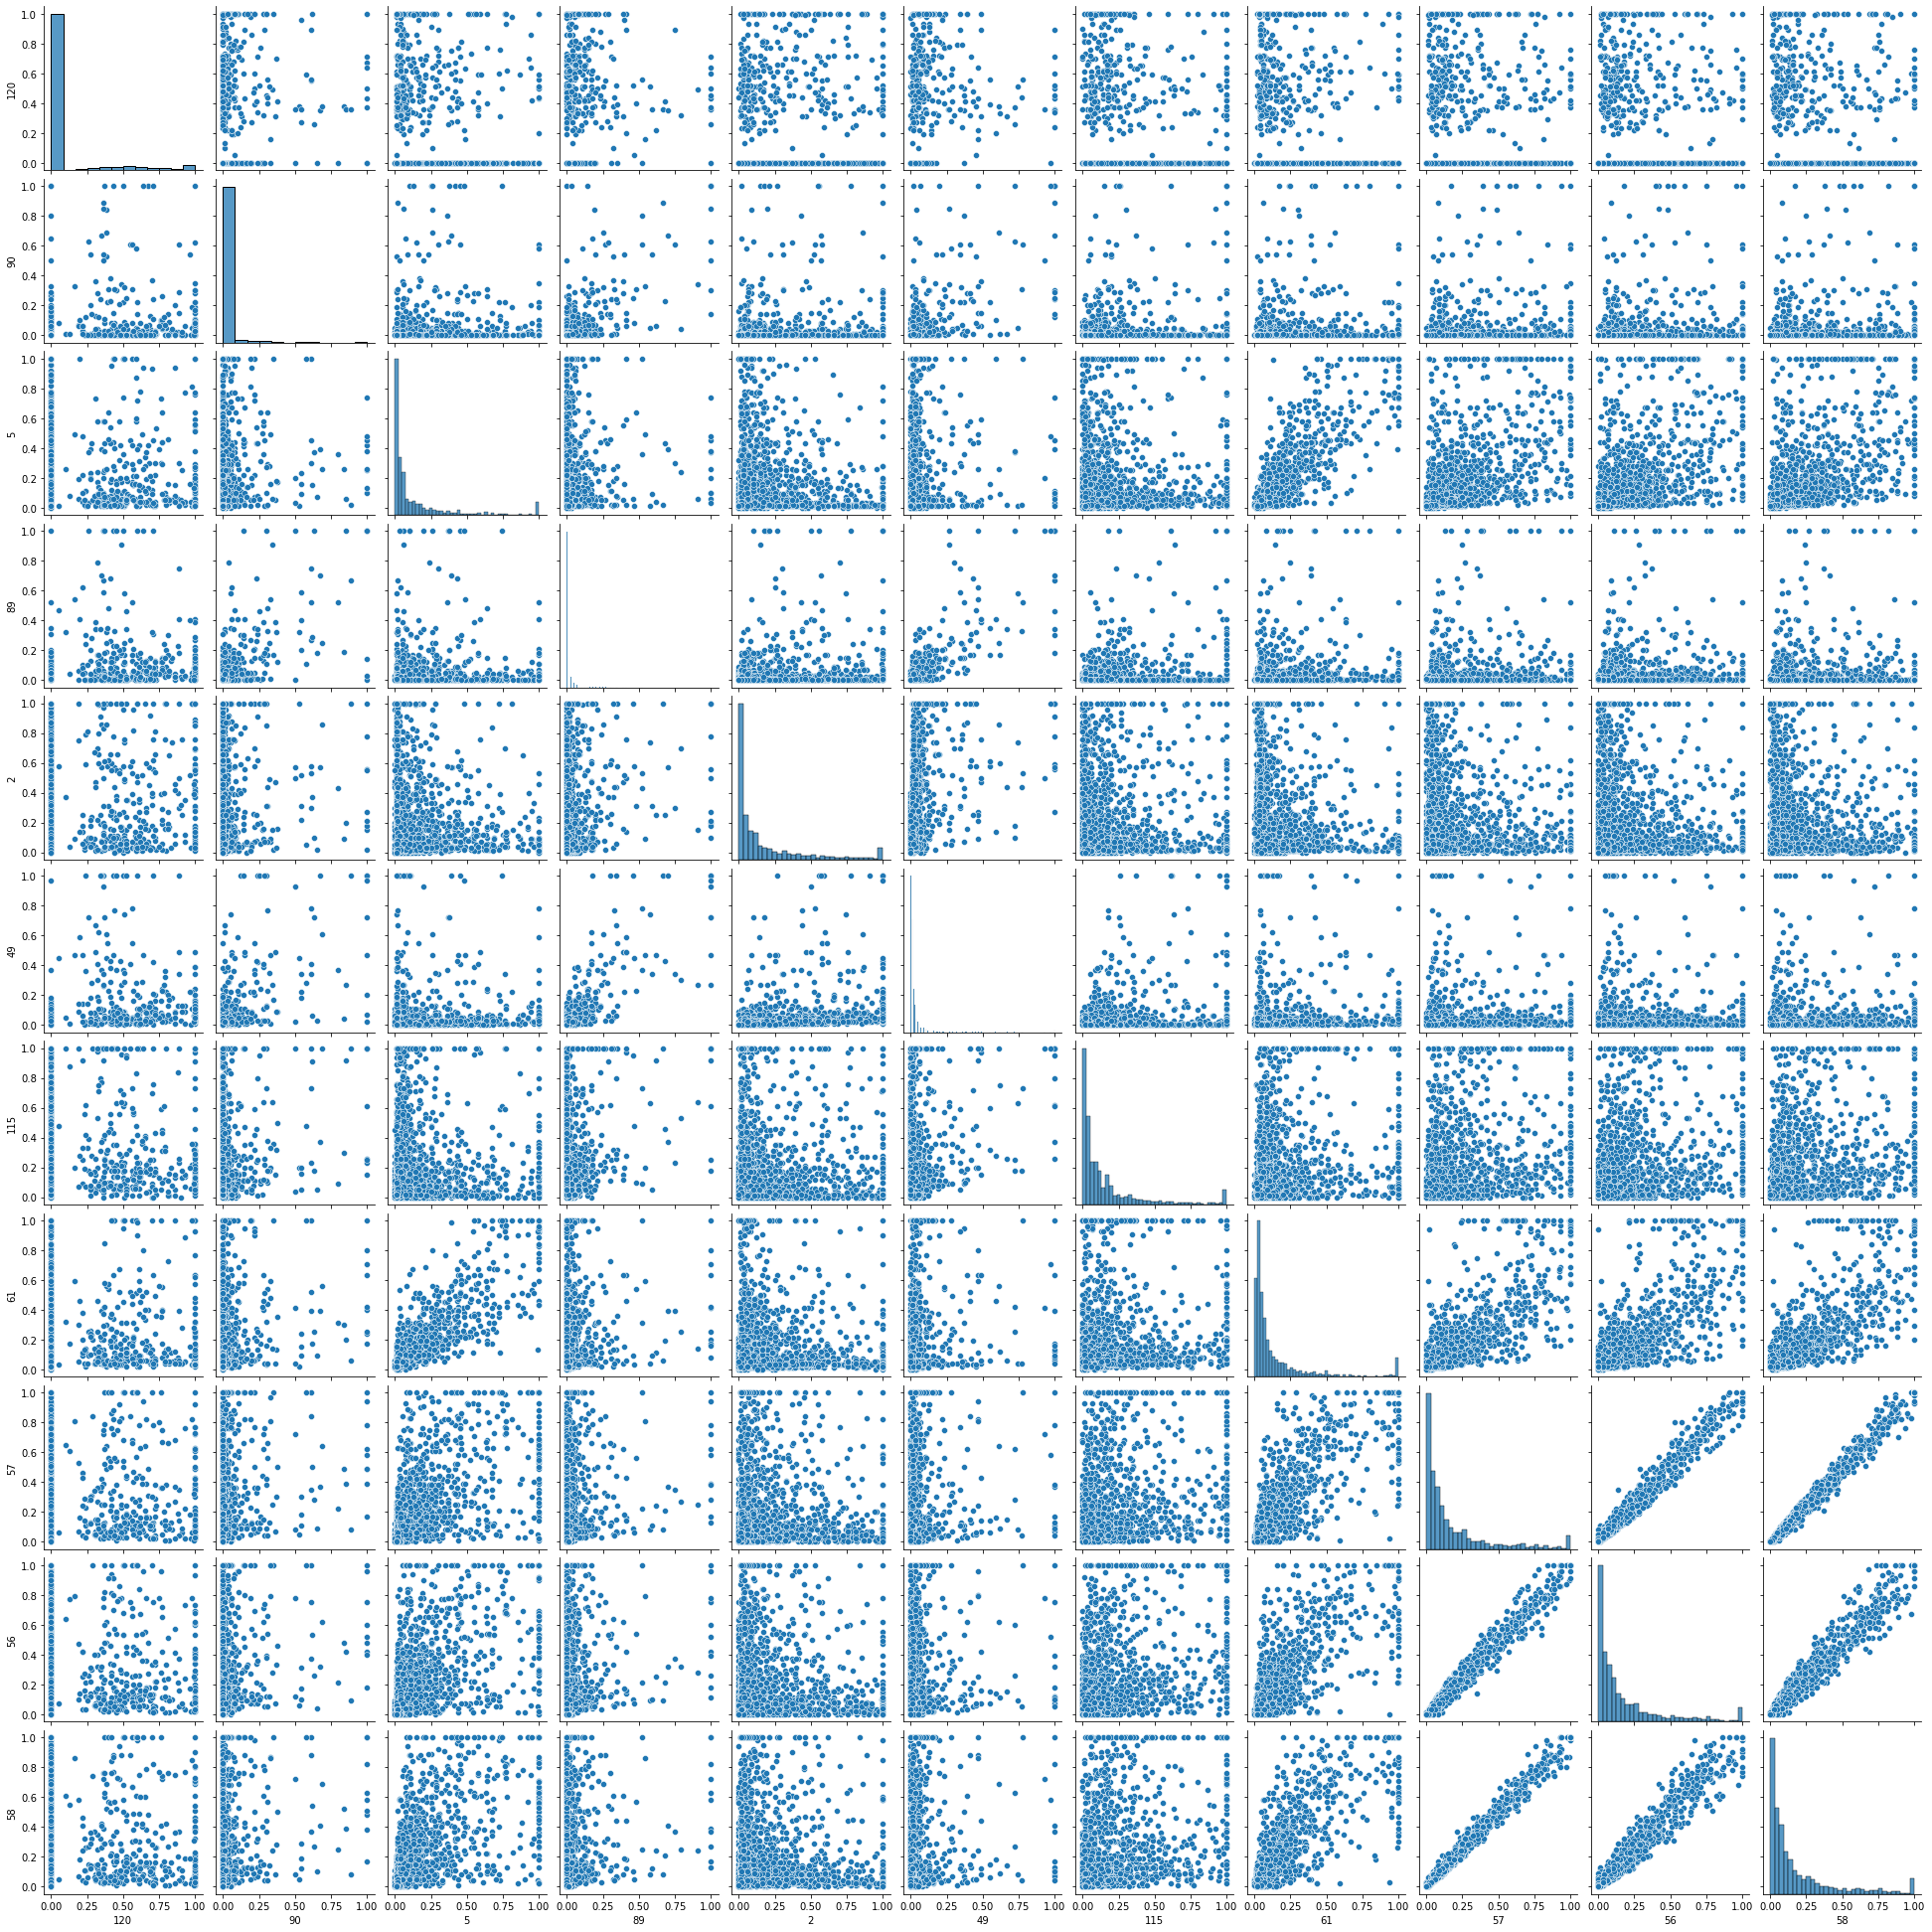

120


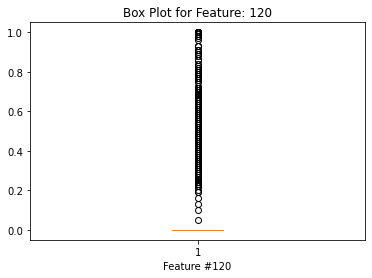

90


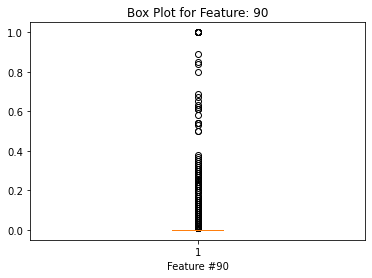

5


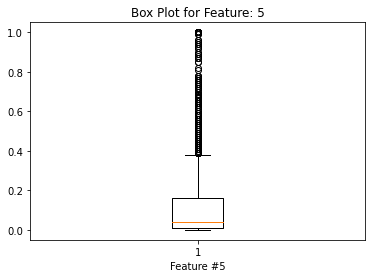

89


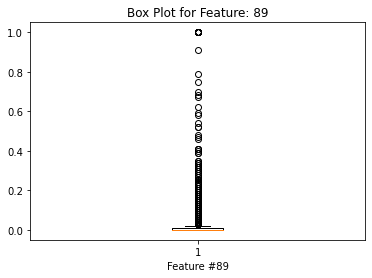

2


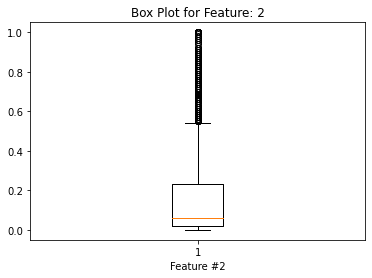

49


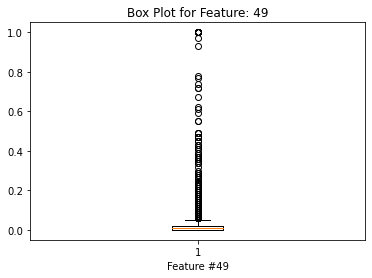

115


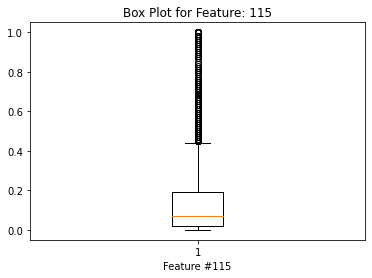

61


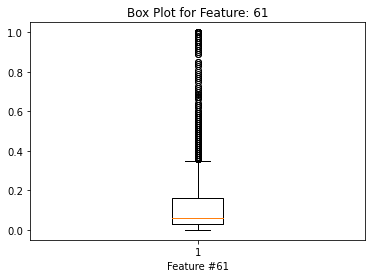

57


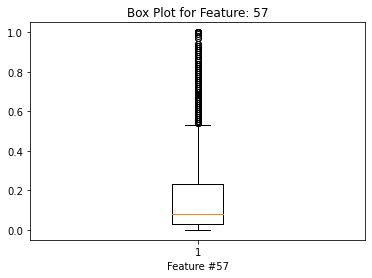

56


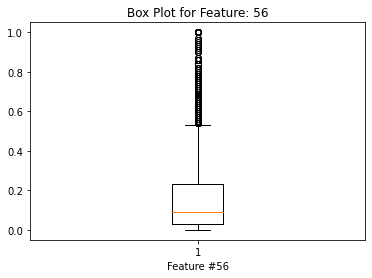

58


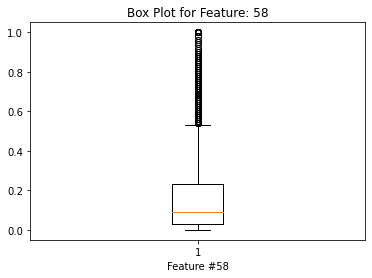

No we cannot draw conclusions about the significance of the features just by looking at the scatter plots.


In [11]:
num_feat = math.floor(math.sqrt(128))
cv_dict = {}
for i in cv:
    cv_dict[cv.index(i)] = i
sorted_cv = sorted(cv_dict.items(), key = lambda x:x[1], reverse = True)
sorted_df = pd.DataFrame(sorted_cv)
highest_df = sorted_df[0:11]
highest_df.rename(columns={0:'Index', 1:'CV'})
print("11 Highest CV's")
print(highest_df)
con_high_df = concat_df[highest_df[0]]
sns.pairplot(con_high_df)
plt.show()
for i in con_high_df:
    print(i)
    plt.boxplot(con_high_df[i])
    plt.title('Box Plot for Feature: '+str(i))
    plt.xlabel('Feature #'+str(i))
    plt.show()
print("No we cannot draw conclusions about the significance of the features just by looking at the scatter plots.")

### (f) Fit a linear model

In [12]:
train_set_x = new_train.iloc[:, :122]
test_set_x = new_test.iloc[:, :122]
train_set_y = new_train.iloc[:, 122]
test_set_y = new_test.iloc[:,122]
lin_reg = LinearRegression()
lin_reg.fit(train_set_x, train_set_y)
pred_y = lin_reg.predict(test_set_x)
mse = mean_squared_error(pred_y, test_set_y)
print("The test error (mse) is: "+str(mse))

The test error (mse) is: 9.85753569285974e+16


### (g) Fit a ridge regression model

In [45]:
#must standardize all features before applying ridge
# stand_df = pd.DataFrame(scale(concat_df))
# stand_train = stand_df.iloc[:1495]
# stand_test = stand_df.iloc[1495:]
# stand_train_x = stand_train.iloc[:,:122]
# stand_train_y = stand_train.iloc[:,122]
# stand_test_x = stand_test.iloc[:,:122]
# stand_test_y = stand_test.iloc[:,122]
stand_train_x = StandardScaler().fit_transform(train_set_x)
stand_test_x= StandardScaler().fit_transform(test_set_x)
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(stand_train_x, train_set_y)
ridge_pred = ridge.predict(stand_train_x) #SHOULD THIS BE STANDARDIZED TRAIN SET or NON-STANDARDIZED TRAIN SET
alpha = ridge.alpha_ #choosing the best lambda (least error)
min_err_ridge = RidgeCV(alphas=alpha).fit(stand_train_x, train_set_y)
new_pred = min_err_ridge.predict(stand_test_x)
ridge_mse = mean_squared_error(test_set_y, new_pred)
print("The test error obtained is: "+str(ridge_mse)+". The lambda used is: "+str(alpha))

The test error obtained is: 0.017171216601539908. The lambda used is: 1.0


### (h) Fit a LASSO model

In [48]:
lasso = LassoCV().fit(train_set_x, train_set_y)
lasso.score(test_set_x, test_set_y)
coef_list = lasso.coef_
lasso_df = pd.DataFrame()
lasso_df['Training Data Columns'] = train_set_x.columns
lasso_df['Lasso Coefficients'] = coef_list
vars_list_df = lasso_df.loc[lasso_df['Lasso Coefficients'] != 0]
lasso_pred = lasso.predict(test_set_x)
lasso_mse = mean_squared_error(test_set_y, lasso_pred)
print("The test error obtained is: "+str(lasso_mse))
print("The list of variables is: "+str(vars_list_df['Training Data Columns'].tolist()))
# stand_df = pd.DataFrame(scale(concat_df))
# stand_train = stand_df.iloc[:1495]
# stand_test = stand_df.iloc[1495:]
# stand_train_x = stand_train.iloc[:,:122]
# stand_train_y = stand_train.iloc[:,122]
# stand_test_x = stand_test.iloc[:,:122]
# stand_test_y = stand_test.iloc[:,122]
lasso_2 = LassoCV().fit(stand_train_x, train_set_y)
# lasso_2.score(stand_test_x, stand_test_y)
vars_list_2 = lasso_2.coef_
lasso_pred_2 = lasso_2.predict(stand_test_x)
lasso_mse_2 = mean_squared_error(test_set_y, lasso_pred_2)
print("The standardized test error obtained is: "+str(lasso_mse_2)+". It seems that the standardized test error is alot higher than that of the non-standardized test error.")

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007259288734125846, tolerance: 0.006693136521739131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0074526733987063665, tolerance: 0.006693136521739131
  model = cd_fast.enet_coordinate_descent_gram(


The test error obtained is: 0.016865748225391636
The list of variables is: [2, 4, 5, 6, 7, 9, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 28, 29, 33, 34, 35, 38, 39, 40, 44, 45, 48, 49, 50, 51, 53, 61, 63, 64, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 85, 86, 87, 88, 89, 90, 91, 94, 99, 100, 101, 102, 104, 106, 108, 111, 112, 113, 115, 116, 118, 119]
The standardized test error obtained is: 0.016832849858789578. It seems that the standardized test error is alot higher than that of the non-standardized test error.


C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00688863924551697, tolerance: 0.006693136521739131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007252386741662065, tolerance: 0.006693136521739131
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00767121897151668, tolerance: 0.0067464160785953185
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

### (i) Fit a PCR model

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


### (j) Fit a boosting tree